In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Reading data from the URL directly.

In [2]:
url = "https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv"  #https://blogs.ed.ac.uk/mnaylor/2018/10/07/web-scraping-in-python/
df = pd.read_csv(url)
df.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine_C/S
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine_C/S
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine_C/S
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine_C/S
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine_C/S


# 2. Exploratory data analysis

## a.

In [3]:
df_InputFeatures=df.drop(['Genotype','Treatment_Behavior'],axis=1)

In [4]:
df_mean=df_InputFeatures.apply(lambda x: x.mean())

## b.

In [5]:
df_corr=df_InputFeatures.corr().abs()

In [6]:
df_corr

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
DYRK1A_N,1.000000,0.961321,0.407110,0.314795,0.340011,0.182126,0.085401,0.158167,0.082463,0.811398,...,0.223812,0.250262,0.150564,0.358480,0.224427,0.035929,0.406055,0.324198,0.518361,0.457907
ITSN1_N,0.961321,1.000000,0.495102,0.428745,0.421034,0.149509,0.068712,0.114789,0.200468,0.796880,...,0.220720,0.331306,0.247760,0.299066,0.300170,0.039384,0.354554,0.403525,0.558266,0.495085
BDNF_N,0.407110,0.495102,1.000000,0.817986,0.746004,0.241501,0.332689,0.129602,0.569146,0.458951,...,0.112984,0.279752,0.210969,0.070504,0.265185,0.454025,0.207555,0.247121,0.331191,0.304098
NR1_N,0.314795,0.428745,0.817986,1.000000,0.866667,0.185322,0.220929,0.253744,0.599846,0.399791,...,0.100915,0.434723,0.369966,0.227674,0.364487,0.486483,0.253118,0.287997,0.404977,0.205033
NR2A_N,0.340011,0.421034,0.746004,0.866667,1.000000,0.076446,0.079740,0.223203,0.362348,0.387644,...,0.237932,0.486259,0.321165,0.215495,0.426562,0.377628,0.292016,0.326056,0.468892,0.185840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SYP_N,0.035929,0.039384,0.454025,0.486483,0.377628,0.199349,0.232262,0.187727,0.383455,0.003932,...,0.115625,0.044640,0.020941,0.392329,0.010451,1.000000,0.131303,0.093264,0.001912,0.273142
H3AcK18_N,0.406055,0.354554,0.207555,0.253118,0.292016,0.317508,0.256479,0.229161,0.176392,0.234061,...,0.121694,0.406723,0.323245,0.224768,0.216137,0.131303,1.000000,0.355167,0.744541,0.263963
EGR1_N,0.324198,0.403525,0.247121,0.287997,0.326056,0.313131,0.366838,0.137520,0.124001,0.199574,...,0.417847,0.831734,0.847950,0.291173,0.744911,0.093264,0.355167,1.000000,0.774110,0.487640
H3MeK4_N,0.518361,0.558266,0.331191,0.404977,0.468892,0.372945,0.378236,0.080201,0.004925,0.277739,...,0.268944,0.717214,0.688121,0.307902,0.594812,0.001912,0.744541,0.774110,1.000000,0.452618


In [7]:
df_strongCorr = df_corr.apply(lambda x : x >0.5, axis = 1)
df_strongCorr[df_strongCorr == True].count().mean()# mean number of strong correlation between the features

10.714285714285714

In [8]:
df_weakCorr = df_corr.apply(lambda x : x <0.5, axis = 1)
df_weakCorr[df_weakCorr == True].count().mean()# mean number of weak correlation between the features

66.28571428571429

In [9]:
print(df_strongCorr[df_strongCorr == True].count().max(), "is the maximum number of strong correlation for any features whereas",
      df_weakCorr[df_weakCorr == True].count().max(),  "is the maximum number of weak correlation for any features.")


23 is the maximum number of strong correlation for any features whereas 75 is the maximum number of weak correlation for any features.


## The entire input features (Type of protein) is weakly correlated

## C.

In [10]:
# The following code counts the number of duplicates.
df.pivot_table(index = ['Genotype'], aggfunc ='size')#https://sparkbyexamples.com/pandas/how-to-count-duplicates-in-pandas-dataframe/#:~:text=Pandas%20Count%20Duplicates,column%20of%20a%20given%20DataFrame.

Genotype
Control    435
Ts65Dn     327
dtype: int64

In [11]:
# The following code counts the number of duplicates.
df.pivot_table(index = ['Treatment_Behavior'], aggfunc ='size')#https://sparkbyexamples.com/pandas/how-to-count-duplicates-in-pandas-dataframe/#:~:text=Pandas%20Count%20Duplicates,column%20of%20a%20given%20DataFrame.

Treatment_Behavior
Memantine_C/S    225
Memantine_S/C    225
Saline_C/S       180
Saline_S/C       132
dtype: int64

## In the multiple outputs ,classes exhibit some imbalance( It's still within 65%-35% contrast , a standard that indicates requirement for class balancing) as mentioned in the literature.

# 3.

In [62]:
# code block for multivariate feature imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(df_InputFeatures)
IterativeImputer(random_state=0)
df_InputFeatures1=pd.DataFrame(imp.transform(df_InputFeatures))

In [63]:
df_InputFeatures1

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,0.107515,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,0.109055,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,0.108598,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,0.118362,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,0.118030,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.394169,0.623696,0.316564,2.104045,3.314706,0.234529,0.200657,3.208804,0.221809,1.218951,...,0.216128,0.156371,0.110916,0.119428,0.115567,0.441207,0.148473,0.146192,0.190681,1.474465
758,0.401739,0.659571,0.321841,2.183930,3.411782,0.236546,0.190826,3.384350,0.231899,1.250487,...,0.209717,0.153224,0.110350,0.118081,0.108944,0.444913,0.153137,0.149798,0.197944,1.516605
759,0.382182,0.586545,0.318545,2.072000,3.073636,0.259636,0.202727,3.006364,0.223455,1.248727,...,0.211279,0.166417,0.133664,0.116134,0.114635,0.422789,0.148426,0.163649,0.191212,1.433514
760,0.365622,0.572209,0.297992,2.004931,2.783551,0.245333,0.190384,2.948221,0.217506,1.177527,...,0.197436,0.158631,0.136994,0.120649,0.120649,0.459901,0.146872,0.140640,0.213899,1.543274


# 4. _ACCURACY_ is chosen as metrics.

# Hyperparameter optimization for ML algorithms

# support vector classification

In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.multioutput import MultiOutputClassifier #https://scikit-learn.org/stable/modules/multiclass.html
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#---------------------------------------------------------------------------
# splitting training and testing dataset
#---------------------------------------------------------------------------
X_train1, X_test1, y_train, y_test = train_test_split(df_InputFeatures1, df[['Genotype','Treatment_Behavior']]
                                                    ,test_size = 0.30, random_state = 101)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train1)
X_test = scaler.transform(X_test1)


In [15]:
model = SVC()
multi_target_svm = MultiOutputClassifier(model)
C=[0.1,1,10,100,1000]
score_mean=[]
for i in C:
    model = SVC(kernel='linear', C=i, random_state=42)
    multi_target_svm = MultiOutputClassifier(model)
    scores = cross_val_score(multi_target_svm,X_train,y_train, cv=5) #https://scikit-learn.org/stable/modules/cross_validation.html
    score_mean.append(scores.mean())
best_C=C[score_mean.index(max(score_mean))]

In [16]:
model1 = SVC(kernel='linear',C=best_C)
multi_target_svm1 = MultiOutputClassifier(model, n_jobs=2)
multi_target_svm1.fit(X_train, y_train)
pred_values=multi_target_svm1.fit(X_train, y_train).predict(X_test)
pred_values
#print(classification_report(y_test, pred_values))

array([['Ts65Dn', 'Saline_S/C'],
       ['Ts65Dn', 'Memantine_S/C'],
       ['Control', 'Memantine_C/S'],
       ['Control', 'Memantine_C/S'],
       ['Ts65Dn', 'Saline_C/S'],
       ['Ts65Dn', 'Memantine_C/S'],
       ['Control', 'Saline_S/C'],
       ['Control', 'Saline_S/C'],
       ['Control', 'Saline_S/C'],
       ['Control', 'Memantine_S/C'],
       ['Ts65Dn', 'Memantine_C/S'],
       ['Ts65Dn', 'Memantine_S/C'],
       ['Ts65Dn', 'Memantine_S/C'],
       ['Ts65Dn', 'Memantine_S/C'],
       ['Ts65Dn', 'Saline_C/S'],
       ['Control', 'Saline_C/S'],
       ['Control', 'Saline_C/S'],
       ['Control', 'Memantine_C/S'],
       ['Control', 'Memantine_C/S'],
       ['Control', 'Memantine_S/C'],
       ['Control', 'Saline_C/S'],
       ['Ts65Dn', 'Saline_C/S'],
       ['Control', 'Saline_S/C'],
       ['Ts65Dn', 'Saline_S/C'],
       ['Ts65Dn', 'Memantine_S/C'],
       ['Ts65Dn', 'Saline_C/S'],
       ['Ts65Dn', 'Memantine_C/S'],
       ['Control', 'Saline_C/S'],
       ['Control', '

In [17]:
kernel_width= [1,0.1,0.01,0.001]
best_param=[]
for i in C:
    for j in kernel_width:
        model = SVC(kernel='rbf', C=i, gamma=j, random_state=42)
        multi_target_svm = MultiOutputClassifier(model)
        scores = cross_val_score(multi_target_svm,X_train,y_train, cv=5) #https://scikit-learn.org/stable/modules/cross_validation.html
        print(scores)
        best_param.append(scores.mean())
best_1=best_param.index(max(best_param))

[0.1588785  0.13084112 0.14953271 0.12264151 0.06603774]
[0.1588785  0.13084112 0.25233645 0.12264151 0.06603774]
[0.41121495 0.47663551 0.42056075 0.44339623 0.29245283]
[0.26168224 0.28037383 0.23364486 0.19811321 0.14150943]
[0.1588785  0.17757009 0.1682243  0.1509434  0.06603774]
[0.93457944 0.97196262 0.92523364 0.88679245 0.85849057]
[0.99065421 0.91588785 0.95327103 0.96226415 0.94339623]
[0.64485981 0.71028037 0.61682243 0.75471698 0.69811321]
[0.1588785  0.19626168 0.1682243  0.16037736 0.08490566]
[0.93457944 0.97196262 0.92523364 0.88679245 0.87735849]
[1.         1.         0.98130841 0.99056604 0.98113208]
[0.97196262 0.90654206 0.89719626 0.93396226 0.87735849]
[0.1588785  0.19626168 0.1682243  0.16037736 0.08490566]
[0.93457944 0.97196262 0.92523364 0.88679245 0.87735849]
[1.         1.         0.98130841 0.99056604 0.98113208]
[0.99065421 1.         1.         0.98113208 0.96226415]
[0.1588785  0.19626168 0.1682243  0.16037736 0.08490566]
[0.93457944 0.97196262 0.925233

In [18]:
unique_combinations = []
for i in range(len(C)):
    for j in range(len(kernel_width)):
        unique_combinations.append((C[i],kernel_width[j]))#https://www.geeksforgeeks.org/python-program-to-get-all-unique-combinations-of-two-lists/

In [19]:
best_C_gamma_pair = unique_combinations[best_1]

In [20]:
best_C_gamma_pair

(10, 0.01)

In [21]:
model2 = SVC(kernel='rbf',C=best_C_gamma_pair[0],gamma=best_C_gamma_pair[1])
multi_target_svm2 = MultiOutputClassifier(model, n_jobs=2)
multi_target_svm2.fit(X_train, y_train)
pred_values1=multi_target_svm2.fit(X_train, y_train).predict(X_test)
pred_values1

array([['Ts65Dn', 'Saline_S/C'],
       ['Ts65Dn', 'Memantine_S/C'],
       ['Control', 'Memantine_C/S'],
       ['Control', 'Memantine_C/S'],
       ['Ts65Dn', 'Saline_C/S'],
       ['Ts65Dn', 'Memantine_C/S'],
       ['Control', 'Saline_S/C'],
       ['Control', 'Saline_S/C'],
       ['Control', 'Saline_S/C'],
       ['Control', 'Memantine_S/C'],
       ['Ts65Dn', 'Memantine_C/S'],
       ['Ts65Dn', 'Memantine_S/C'],
       ['Ts65Dn', 'Memantine_S/C'],
       ['Ts65Dn', 'Memantine_S/C'],
       ['Ts65Dn', 'Saline_C/S'],
       ['Control', 'Saline_C/S'],
       ['Control', 'Memantine_C/S'],
       ['Control', 'Memantine_C/S'],
       ['Control', 'Memantine_C/S'],
       ['Control', 'Memantine_S/C'],
       ['Control', 'Saline_C/S'],
       ['Ts65Dn', 'Saline_C/S'],
       ['Control', 'Saline_S/C'],
       ['Ts65Dn', 'Saline_S/C'],
       ['Ts65Dn', 'Memantine_S/C'],
       ['Ts65Dn', 'Saline_C/S'],
       ['Ts65Dn', 'Memantine_C/S'],
       ['Control', 'Saline_C/S'],
       ['Control'

# 

In [22]:
# pip install keras
# pip install tensorflow

In [23]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras import regularizers

In [24]:
# from sklearn.preprocessing import OneHotEncoder #https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/

# # Converting type of columns to category
# df['Genotype']=df['Genotype'].astype('category')
# df['Treatment_Behavior']=df['Treatment_Behavior'].astype('category')


# #Assigning numerical values and storing it in another columns
# df['Gen_new']=df['Genotype'].cat.codes
# df['Treat_new']=df['Treatment_Behavior'].cat.codes


# #Create an instance of One-hot-encoder
# enc=OneHotEncoder()

# #Passing encoded columns
# enc_data=pd.DataFrame(enc.fit_transform(df[['Gen_new','Treat_new']]).toarray())

# #Merge with main
# New_df=pd.concat([df_InputFeatures1,df[['Genotype','Treatment_Behavior']], enc_data], axis=1)

# New_df
# df1=df['Genotype'].unique()
# df2=df['Treatment_Behavior'].unique()
# layer = tf.keras.layers.CategoryEncoding(num_tokens=2, output_mode="multi_hot")
# layer(df1, df2)


In [25]:
# input_matrix  = New_df.iloc[: , :77] #https://thispointer.com/select-first-n-columns-of-pandas-dataframe/
# output_matrix = New_df.iloc[: , 79:85]

In [26]:
# print(enc_data)

In [27]:
# # initializing and creating layers in the ANN.
# ann = tf.keras.models.Sequential()
# ann.add(tf.keras.layers.Dense(units=6,activation="relu",kernel_regularizer=regularizers.L2(1)))
# ann.add(tf.keras.layers.Dense(units=8,activation="softmax"))

In [28]:
# # compiling ANN
# ann.compile(optimizer="SGD",loss="categorical_crossentropy",metrics=['accuracy'])

In [29]:
# fitting an ANN
# X_Train, X_Test, y_Train, y_Test = train_test_split(input_matrix , output_matrix ,test_size = 0.20, random_state = 42)
# ann.fit(X_Train,y_Train,batch_size=70,epochs = 100)

In [30]:
# layer = tf.keras.layers.CategoryEncoding(
#           num_tokens=4, output_mode="multi_hot")
# layer([[0, 1,2], [0, 0], [1, 2], [3, 1]])

# Random forest classification

In [41]:
X_train1, X_test1, y_train, y_test = train_test_split(df_InputFeatures1, df[['Genotype']]
                                                    ,test_size = 0.30, random_state = 101)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train1)
X_test = scaler.transform(X_test1)

In [42]:
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import confusion_matrix
max_depth=[2,4,6,8,10]
var_perNode=[2,4,6,8,10]
best_mes_1=[]
best_mes_2=[]
for i in max_depth:
    for j in var_perNode:
        classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy",max_depth=i,max_features=j,random_state = 101)  
        scores = cross_val_score(classifier,X_train,y_train, cv=5) #https://scikit-learn.org/stable/modules/cross_validation.html
        best_mes_1.append(scores.mean())
best_RF=best_mes_1.index(max(best_mes_1))
# best_RF_2=best_mes_2.index(max(best_mes_2))

C:\Users\MOHIT PRAJAPAT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MOHIT PRAJAPAT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MOHIT PRAJAPAT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MOHIT PRAJAPAT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataCon

In [43]:
unique_combinations_RF = []
for i in range(len(max_depth)):
    for j in range(len(var_perNode)):
        unique_combinations_RF.append((max_depth[i],var_perNode[j]))#https://www.geeksforgeeks.org/python-program-to-get-all-unique-combinations-of-two-lists/
best_RF_pair = unique_combinations_RF[best_RF]    
best_RF_pair

(10, 10)

In [44]:
classifier1= RandomForestClassifier(n_estimators= 10, criterion="entropy",max_depth=best_RF_pair[0],max_features=best_RF_pair[1],random_state = 51)  
classifier1.fit(X_train, y_train)  
y_pred1=classifier1.predict(X_test)
cm1 = confusion_matrix(y_test, y_pred1) 
cm1

C:\Users\MOHIT PRAJAPAT\AppData\Local\Temp\ipykernel_10684\2049687388.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier1.fit(X_train, y_train)


array([[133,   2],
       [  8,  86]], dtype=int64)

## Feature importance for support vector machine (linear kernel)

C:\Users\MOHIT PRAJAPAT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MOHIT PRAJAPAT\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


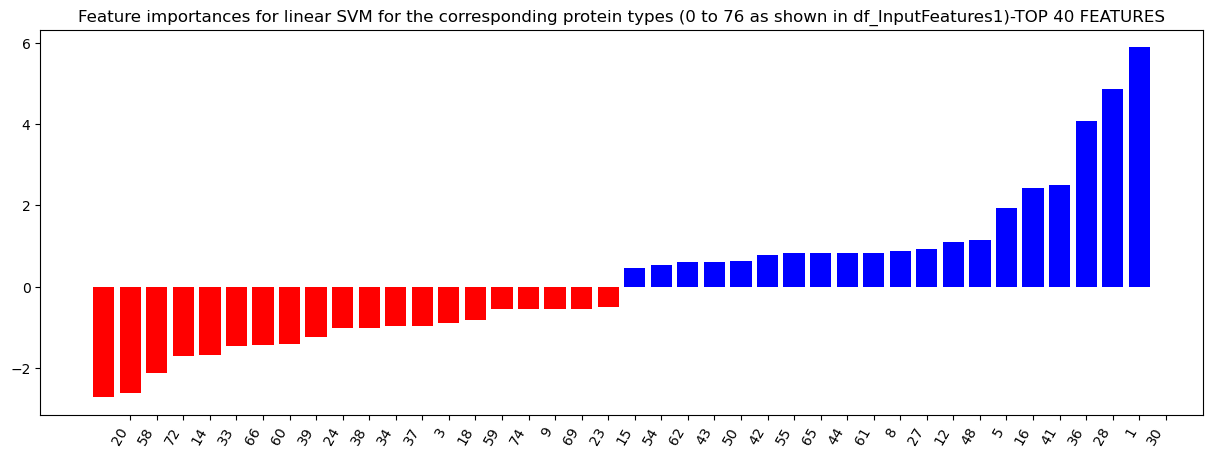

In [120]:
# https://aneesha.medium.com/visualising-top-features-in-linear-svm-with-scikit-learn-and-matplotlib-3454ab18a14d
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
def plot_coefficients(classifier, feature_names, top_features=20):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.title('Feature importances for linear SVM for the corresponding protein types (0 to 76 as shown in df_InputFeatures1)-TOP 40 FEATURES')
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.show()
svm = LinearSVC()
svm.fit(df_InputFeatures1, df[['Genotype']])
plot_coefficients(svm,df_InputFeatures1.columns.values)

## Feature importance for Random Forest

C:\Users\MOHIT PRAJAPAT\AppData\Local\Temp\ipykernel_10684\1960332269.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


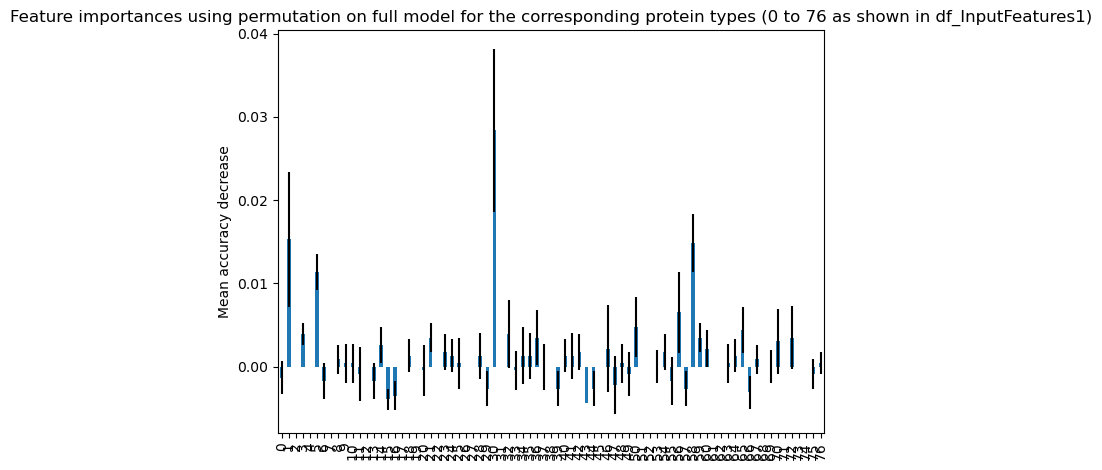

<Figure size 50000x1000 with 0 Axes>

<Figure size 50000x1000 with 0 Axes>

In [119]:
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
from sklearn.inspection import permutation_importance
forest=RandomForestClassifier()
forest.fit(X_train, y_train)  
result = permutation_importance(forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
forest_importances = pd.Series(result.importances_mean, index=df_InputFeatures1.columns.values)
important_features = forest_importances.tolist()
important_features
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model for the corresponding protein types (0 to 76 as shown in df_InputFeatures1)")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()
plt.figure(figsize=(500, 10))



In [115]:
important_features # for the corresponding protein types (0 to 76 as shown in df_Inputfeatures1)
# this list represents values in the previous plot

[0.0,
 0.0205240174672489,
 0.003056768558951972,
 0.0,
 0.0,
 0.007423580786026218,
 0.0,
 0.0,
 0.002183406113537123,
 0.0,
 0.003056768558951972,
 0.0,
 0.0026200873362445475,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.003056768558951972,
 0.0004366812227074246,
 0.0026200873362445475,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.05065502183406114,
 0.0,
 0.0017467248908296985,
 0.0,
 0.0008733624454148492,
 0.003930131004366821,
 0.009606986899563342,
 0.0,
 0.0,
 0.0,
 0.0004366812227074246,
 0.0004366812227074246,
 0.0008733624454148492,
 0.0,
 0.0,
 0.0004366812227074246,
 0.003056768558951972,
 0.0,
 0.003493449781659397,
 0.0004366812227074246,
 0.008733624454148492,
 0.0,
 0.0,
 -0.0026200873362445475,
 0.003930131004366821,
 -0.0017467248908296985,
 0.004803493449781671,
 0.0,
 0.020960698689956314,
 0.0,
 0.0,
 0.0,
 0.0004366812227074246,
 -0.0008733624454148492,
 0.0,
 0.006113537117903944,
 -0.0008733624454148492,
 0.0,
 0.0,
 0.0,
 -0.0008733624454148492,
 0.0,
 0.003